In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

## Data exploring

In [3]:
file_observation_year_count = f'../1_scraping/scraped_data/cleaned/observation_year_count_clean.csv'

# Load the data
df_year_count = pd.read_csv(file_observation_year_count, header=0)

# Preview
df_year_count.head(5)

,year,observation_count,individu_count
0,1971,2242,34987
1,1972,5281,80669
2,1973,6547,99533
3,1974,9548,147922
4,1975,9115,122869


In [4]:
df_year_count.index

RangeIndex(start=0, stop=54, step=1)

In [5]:
df_year_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   year               54 non-null     int64
 1   observation_count  54 non-null     int64
 2   individu_count     54 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [6]:
df_year_count.describe(include='all')

,year,observation_count,individu_count
count,54.000000,5.400000e+01,5.400000e+01
mean,1997.500000,6.770629e+05,2.496192e+07
std,15.732133,1.101915e+06,1.136369e+08
min,1971.000000,2.242000e+03,3.498700e+04
25%,1984.250000,3.569200e+04,1.209611e+06
50%,1997.500000,8.169650e+04,2.920168e+06
75%,2010.750000,1.071938e+06,1.728578e+07
max,2024.000000,3.807834e+06,8.335484e+08


## Yearly Evolution

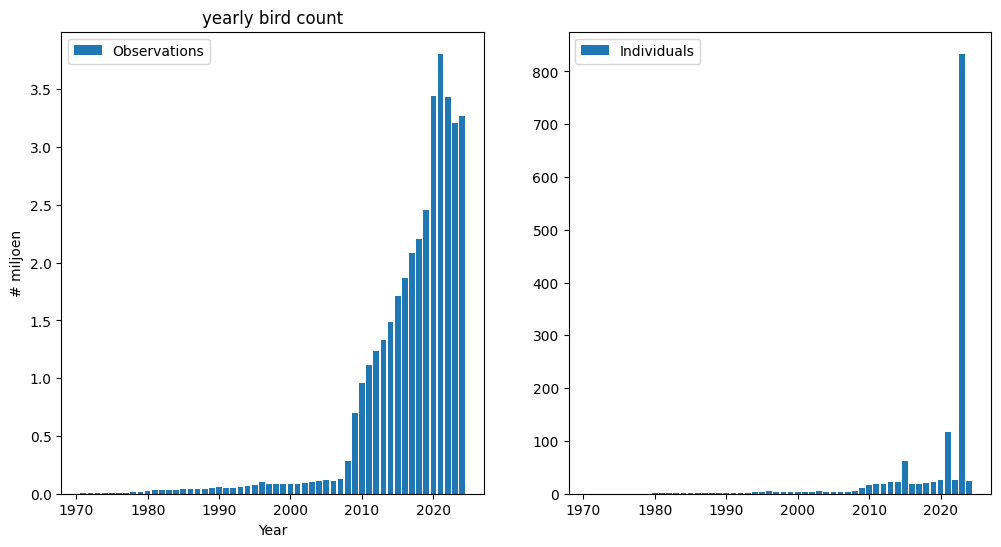

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.bar(df_year_count['year'], df_year_count['observation_count']/1_000_000, label='Observations')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('# miljoen')
ax1.set_title('yearly bird observations')

ax2.bar(df_year_count['year'], df_year_count['individu_count']/1_000_000, label='Individuals')
ax2.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('# miljoen')
ax1.set_title('yearly bird count')

plt.show()

# Final check and creation csv